# KNN Regressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [2]:
df=pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


Missing Values are present in dataset

In [4]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [5]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

Missing value is in the form of ? 

replace it by nan

In [6]:
df["normalized-losses"].replace("?",np.nan,inplace=True)

In [7]:
df["horsepower"].replace("?",np.nan,inplace=True)

In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [9]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["normalized-losses","horsepower"]]=si.fit_transform(df[["normalized-losses","horsepower"]])
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [10]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,104.256158,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,39.519211,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


1. Dataset contains 205 response and 15 features.
2. Mean and Median are not equal so data has skewness.
3. Here we need to predict the price of car depending upon various attributes.

So Price is Target & other attributes are Features.

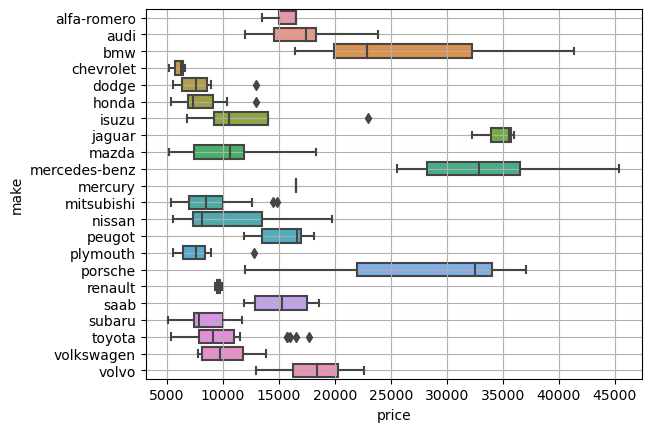

In [11]:
sns.boxplot(data=df,x=df.iloc[:,-1],y=df["make"])
plt.grid()

In [12]:
df[(df["make"]=="dodge") & (df["price"]>10000)] 

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [13]:
df.drop(29,axis=0,inplace=True)

In [14]:
df[(df["make"]=="honda") & (df["price"]>12500)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [15]:
df.drop(41,axis=0,inplace=True)

In [16]:
df[(df["make"]=="isuzu") & (df["price"]>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [17]:
df.drop(45,axis=0,inplace=True)

In [18]:
df[(df["make"]=="mitsubishi") & (df["price"]>12500)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
82,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12629
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [19]:
df.drop([82,83,84],axis=0,inplace=True)

In [20]:
df[(df["make"]=="plymouth") & (df["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [21]:
df.drop(124,axis=0,inplace=True)

In [22]:
df[(df["make"]=="toyota") & (df["price"]>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [23]:
df.drop([172,178,179,180,181],axis=0,inplace=True)

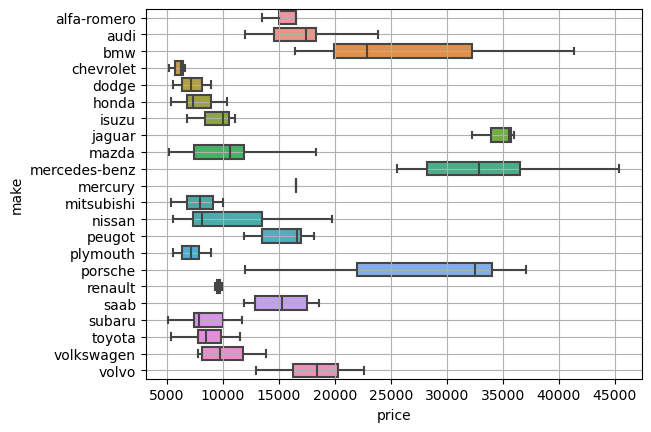

In [24]:
sns.boxplot(data=df,x=df.iloc[:,-1],y="make")
plt.grid()

All Outliers are Removed

In [25]:
x=df.iloc[:,:-1]
x.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22


In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   body-style         193 non-null    object 
 5   drive-wheels       193 non-null    object 
 6   engine-location    193 non-null    object 
 7   width              193 non-null    float64
 8   height             193 non-null    float64
 9   engine-type        193 non-null    object 
 10  engine-size        193 non-null    int64  
 11  horsepower         193 non-null    float64
 12  city-mpg           193 non-null    int64  
 13  highway-mpg        193 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 22.6+ KB


In [27]:
y=df.iloc[:,-1]
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

# Skewness Removal

In [28]:
colname=x.select_dtypes(["int64","float64"]).columns
colname

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [29]:
from scipy.stats import skew
for i in x[colname]:
    print(i)
    print(skew(x[i]))

symboling
0.2147470605758054
normalized-losses
0.846315331460635
width
0.9147899492639983
height
0.007986794777796822
engine-size
2.0664919440355707
horsepower
1.576213559993105
city-mpg
0.5925146641287237
highway-mpg
0.4682909445793763


symboling
0.2147470605758054


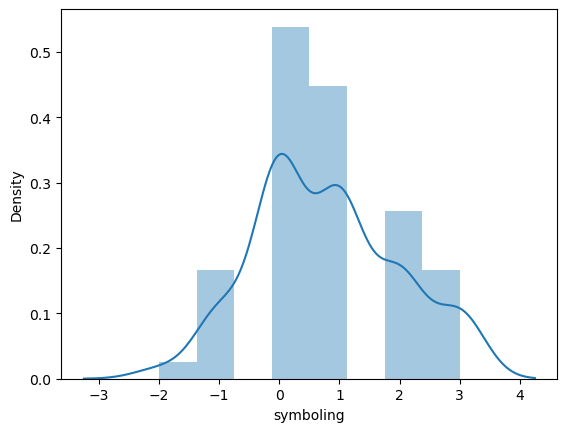

<Figure size 640x480 with 0 Axes>

normalized-losses
0.846315331460635


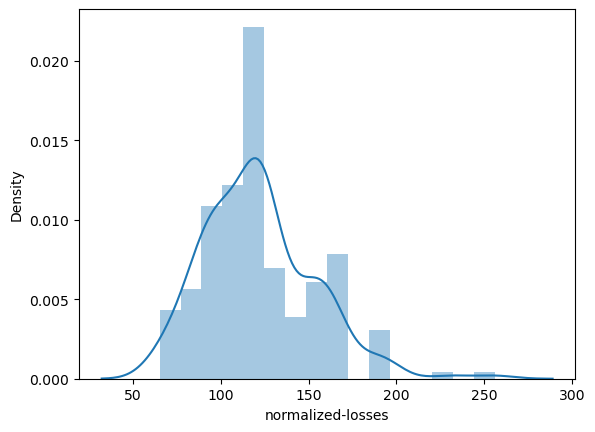

<Figure size 640x480 with 0 Axes>

width
0.9147899492639983


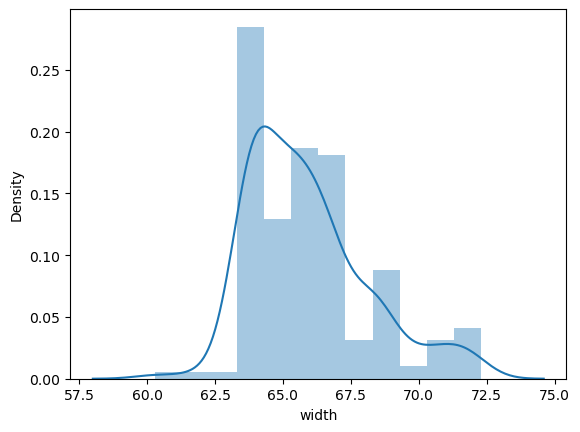

<Figure size 640x480 with 0 Axes>

height
0.007986794777796822


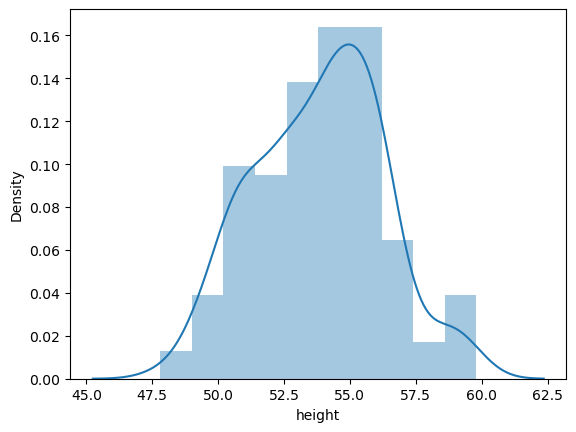

<Figure size 640x480 with 0 Axes>

engine-size
2.0664919440355707


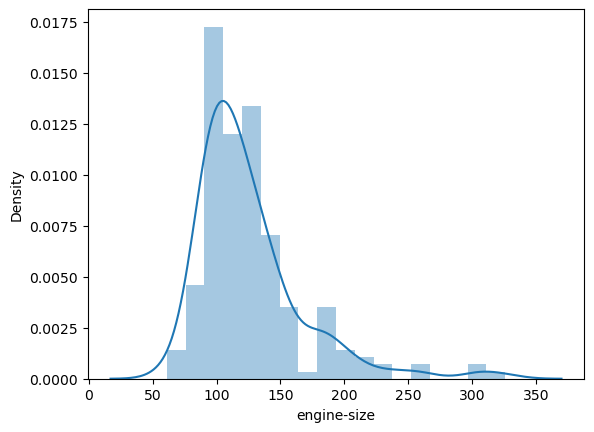

<Figure size 640x480 with 0 Axes>

horsepower
1.576213559993105


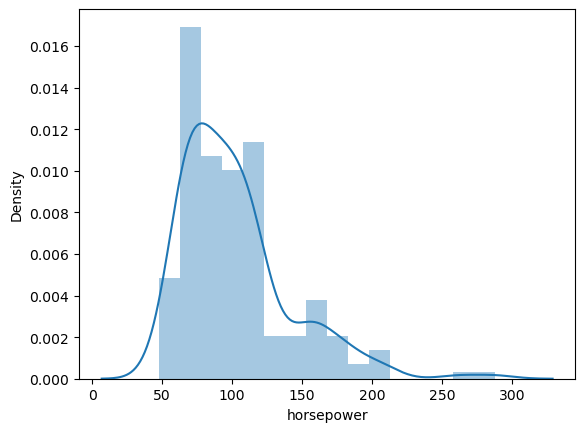

<Figure size 640x480 with 0 Axes>

city-mpg
0.5925146641287237


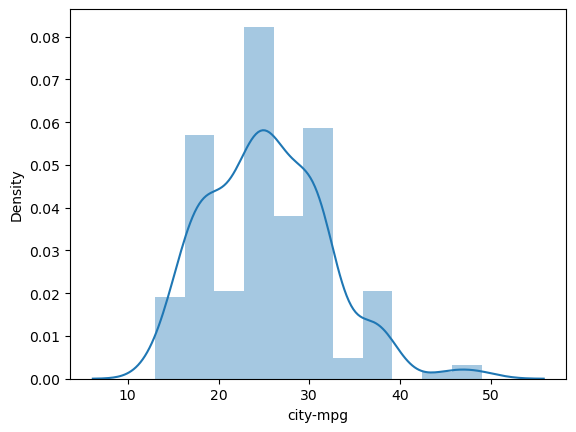

<Figure size 640x480 with 0 Axes>

highway-mpg
0.4682909445793763


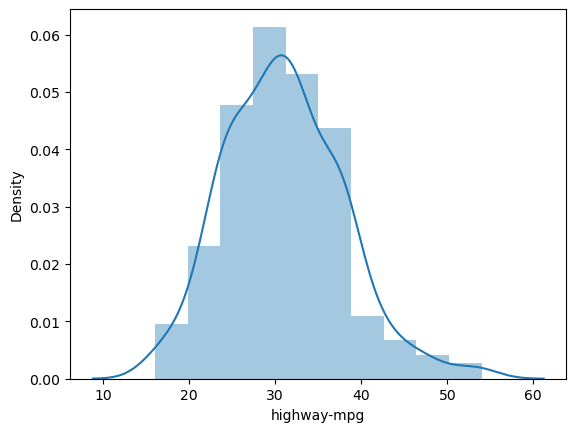

<Figure size 640x480 with 0 Axes>

In [30]:
for i in x[colname]:
    print(i)
    print(skew(x[i]))
    sns.distplot(x[i])
    plt.figure()
    plt.show()

<AxesSubplot:>

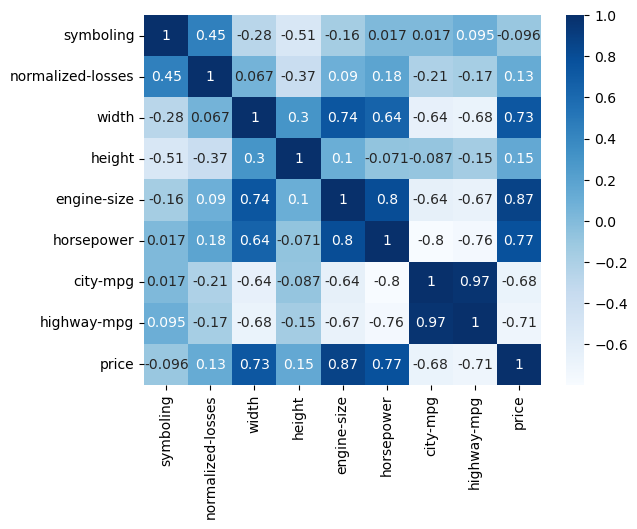

In [31]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

In [32]:
df.corr()["price"].sort_values()

highway-mpg         -0.707051
city-mpg            -0.682415
symboling           -0.096215
normalized-losses    0.129980
height               0.147417
width                0.730630
horsepower           0.771608
engine-size          0.871044
price                1.000000
Name: price, dtype: float64

From above we can see that there is need of removing skewness for normalized losses only.

In [33]:
x["normalized-losses"]=np.log(x["normalized-losses"])
x.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22


In [34]:
skew(x["normalized-losses"])

0.020674302162479046

Skewness is reduced for normalized-losses from 0.846 to 0.020

# Handling Categorical Data

In [35]:
catcol=x.select_dtypes(object).columns
catcol

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [36]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[catcol]=oe.fit_transform(x[catcol])
x.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22


# Linear Model Creation

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [38]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [39]:
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

0.7895546813751259


In [40]:
train=linreg.score(xtrain,ytrain)
test=linreg.score(xtest,ytest)

print(f"Training Accuracy:{train}\n Testing Accuracy:{test}")

Training Accuracy:0.8967228933546582
 Testing Accuracy:0.7895546813751259


Model has:- Low Bais & High Variance

Model has Overfitting:- Which  was evident since it has more complexity (more features)

In [41]:
linreg.coef_

array([  442.43598287,  -863.74227817,  -122.81244081, -1105.10038981,
         -93.83829291,  1845.72101506, 13868.40760353,   775.77851733,
         292.66184187,   -20.71849431,    86.99182135,    18.75711617,
         132.5036889 ,  -225.54362234])

In [42]:
pd.DataFrame(linreg.coef_,index=x.columns,columns=["coefficients"])

,coefficients
symboling,442.435983
normalized-losses,-863.742278
make,-122.812441
fuel-type,-1105.100390
body-style,-93.838293
drive-wheels,1845.721015
engine-location,13868.407604
width,775.778517
height,292.661842
engine-type,-20.718494


# KNN Model 

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)

print(f"Training Accuracy:{train}\n Testing Accuracy:{test}")

0.7719698858865982
Training Accuracy:0.8971106670428599
 Testing Accuracy:0.7719698858865982


# Hyperparameter tunning for KNN Regressor

In [56]:
for i in range (1,31):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    print(f"{i} {train} {test}")

1 0.9920198385790082 0.770595736726086
2 0.9667734288597374 0.793140980277814
3 0.9285113270353763 0.8555455670010874
4 0.9142238127954221 0.8126971280293032
5 0.8971106670428599 0.7719698858865982
6 0.8741985941875313 0.7207179966265236
7 0.8467266652587366 0.7078131984303446
8 0.8313229380266819 0.6896663325104762
9 0.8112533767578095 0.6754051473229536
10 0.8083918186664512 0.6940193390232522
11 0.7930032866342238 0.6943548843481856
12 0.7756295900690054 0.6852489215152071
13 0.7628515579650961 0.681067946227296
14 0.7613931827657955 0.6928852580430046
15 0.7572693833568804 0.6719750027392384
16 0.7469476772319044 0.6679400959150021
17 0.7373416592186033 0.668266728554425
18 0.7337338251260143 0.6641867590268251
19 0.7310082048955067 0.6651265745160191
20 0.7241978253909188 0.6528945258038061
21 0.7127202569451518 0.6422874714946131
22 0.7055801807608112 0.6342388309985207
23 0.6931447057876625 0.6274395506385456
24 0.6823088423274932 0.618204462155286
25 0.6742361891614834 0.611559

Best possible result is when n_neighbors=3

In [57]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)

print(f"Training Accuracy:{train}\n Testing Accuracy:{test}")

0.8555455670010874
Training Accuracy:0.9285113270353763
 Testing Accuracy:0.8555455670010874


Accuracy is improved with respect to linear model.